# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
! git clone https://github.com/lydialeelee/scratchpad

fatal: destination path 'scratchpad' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("scratchpad/data/airbnb_NYC.csv", encoding = "latin1")

In [ ]:
df["Price_clean"] = (
    df["Price"] # changing the Price column
    .astype(str) # forces every value to be treated as a string
    .str.replace("$", "", regex=False) # removes the dollar sign from each price
    .str.replace(",", "", regex=False) # removes commas from prices greater than 999
)

In [ ]:
df["Price_clean"] = pd.to_numeric(
    df["Price_clean"], errors="coerce"
) # converted this string column into all numeric values

In [ ]:
df["Price_clean"].isna().sum() # checks number of missing values after cleaning

np.int64(0)

I ended up with 0 missing values.

In [ ]:
mn = pd.read_csv("scratchpad/data/mn_police_use_of_force.csv")

mn["subject_injury"].isna().mean() # identifies missing values and converts to a proportion missing

np.float64(0.7619342359767892)

76.2% is the proportion of missing values

In [ ]:
mn["subject_injury_clean"] = (
    mn["subject_injury"]
    .str.strip()
    .str.title()
)

In [ ]:
pd.crosstab(
    mn["subject_injury_clean"],
    mn["force_type"],
    dropna=False
)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


Yes, there are clear patterns in when injury data are missing. Missing values are concentrated in specific force types like bodily force, chemical irritants, and taser use, while other force types show little to no missing data. This suggests that missingness is not random and likely reflects differences in reporting or documentation practices across force types.

In [ ]:
mn["subject_injury_clean"] = mn["subject_injury_clean"].fillna("Missing")


In [ ]:
print(mn["subject_injury_clean"])

0        Missing
1        Missing
2        Missing
3        Missing
4        Missing
          ...   
12920    Missing
12921    Missing
12922    Missing
12923    Missing
12924    Missing
Name: subject_injury_clean, Length: 12925, dtype: object


In [ ]:
metabric = pd.read_csv("scratchpad/data/metabric.csv")

metabric["Overall_Survival_Status_dummy"] =  (
    metabric["Overall Survival Status"]
    .str.split(":")
    .str[0]
    .astype(int)
)

In [ ]:
print(metabric["Overall Survival Status"])

0         0:LIVING
1       1:DECEASED
2         0:LIVING
3       1:DECEASED
4       1:DECEASED
           ...    
1338      0:LIVING
1339    1:DECEASED
1340      0:LIVING
1341    1:DECEASED
1342      0:LIVING
Name: Overall Survival Status, Length: 1343, dtype: object


In [ ]:
print(metabric["Overall_Survival_Status_dummy"])

0       0
1       1
2       0
3       1
4       1
       ..
1338    0
1339    1
1340    0
1341    1
1342    0
Name: Overall_Survival_Status_dummy, Length: 1343, dtype: int64


In [ ]:
df["Review Scores Rating"].isna().sum()

np.int64(8323)

In [ ]:
df["Review Scores Rating"]

,Review Scores Rating
0,NaN
1,NaN
2,NaN
3,NaN
4,96.0
...,...
30473,NaN
30474,NaN
30475,NaN
30476,NaN


In [ ]:
median_rating = df["Review Scores Rating"].median()

df["Review_Scores_Rating_imputed"] = (
    df["Review Scores Rating"]
    .fillna(median_rating)
)
df["Review_Scores_Rating_imputed"]

,Review_Scores_Rating_imputed
0,94.0
1,94.0
2,94.0
3,94.0
4,96.0
...,...
30473,94.0
30474,94.0
30475,94.0
30476,94.0


Imputing the median review score reduces variability in the data and assumes that listings with missing ratings are typical. In reality, missing ratings may be associated with new or low-quality listings, so median imputation can bias estimates and weaken relationships with other variables.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
shark = pd.read_excel("scratchpad/data/GSAF5.xls") # read_excel will work because it is a .xls

In [ ]:
shark.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7074 non-null   object 
 1   Year            7072 non-null   float64
 2   Type            7056 non-null   object 
 3   Country         7024 non-null   object 
 4   State           6587 non-null   object 
 5   Location        6507 non-null   object 
 6   Activity        6491 non-null   object 
 7   Name            6856 non-null   object 
 8   Sex             6496 non-null   object 
 9   Age             4080 non-null   object 
 10  Injury          7039 non-null   object 
 11  Fatal Y/N       6513 non-null   object 
 12  Time            3547 non-null   object 
 13  Species         3943 non-null   object 
 14  Source          7054 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [ ]:
shark.shape

(7074, 23)

In [ ]:
shark = shark.drop(columns=["Unnamed: 21", "Unnamed: 22"])

In [ ]:
shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN


An observation is one unit represented by a single row of the dataset. In the shark attack dataset, each row corresponds to one reported shark-incident case, since the variables in a row describe the same observation. Because observations are incidents, cleaning should preserve the case structure, missing values should be interpreted as missing incident details (not missing person information), and analyses should be framed in terms of incident counts and rates rather than unique individuals.

In [ ]:
shark["Year"] = shark["Year"].replace(0, np.nan)

In [ ]:
shark_year = shark.dropna(subset=["Year"])
shark_year["Year"] = shark_year["Year"].astype(int)

/tmp/ipython-input-3268747671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_year["Year"] = shark_year["Year"].astype(int)


In [ ]:
shark_year["Year"].min(), shark_year["Year"].max()

(5, 2026)

In [ ]:
shark_post_1940 = shark_year[shark_year["Year"] >= 1940]
shark_post_1940

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,1940,1940,Unprovoked,NEW GUINEA,Bwagaoia,"Bagalina, North coast Misima Island",NaN,small girl,F,NaN,...,Y,NaN,NaN,"A. Bleakley; A. M. Rapson, p.148",1940.00.00.e-small-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.e,1940.00.00.e,1535.0
5536,1940,1940,Unprovoked,PAPUA NEW GUINEA,Western Papuan Gulf,Kerema,male,a native,NaN,NaN,...,N,NaN,NaN,"Papuan Villager, 11/1940",1940.00.00.d-Kerema.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.d,1940.00.00.d,1534.0
5537,1940,1940,Invalid,SOUTH AFRICA,Eastern Cape Province,Kidd's Beach,Swimming,NaN,NaN,NaN,...,NaN,NaN,Questionable incident,"D. Davies, p. 102",1940.00.00.c-KiddsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.c,1940.00.00.c,1533.0
5538,1940,1940,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,...,NaN,NaN,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1532.0


The year variable ranges from 0 to 2026, which is interesting because it is hard to interpret what 0 means. So then I dropped the years with the value of 0 and changed it to a nan value. The range of years went from 5 to 2026.

In [ ]:
attacks_per_year = shark_post_1940.groupby("Year").size()
attacks_per_year

,0
Year,
1940,24
1941,27
1942,41
1943,28
1944,31
...,...
2022,98
2023,109
2024,52


Since 1940, the number of reported shark attacks generally increased over time. However, in 2024-2025, there was a drop in shark attacks, so there may just be an incomplete record.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

The paper is about data tidying, a specific and important part of data cleaning. Wickham argues that a large amount of time in data analysis is spent cleaning data, and there has been little guidance on how to structure data that makes analysis easier. He introduces the concept of tidy data, a standardized way of organizing datasets so they are easier to manipulate, model, and visualize.

The tidy data standard is intended to create a consistent way to organize data values within a dataset. This consistency makes initial data cleaning easier, reduces the need to repeatedly restructure data, and allows analytical tools to work together smoothly. When both data and tools follow the same standard, analysts can focus on the problem at hand rather than continuing to reshape data between steps to fit their analysis.

The first quote means that tidy datasets all share the same predictable structure, while messy datasets can be disorganized in many different ways. Because tidy data follow a common standard, a small set of tools can handle many datasets. In contrast, messy datasets require custom fixes.

The second quote means that while analysts can usually identify variables and observations within a specific dataset, it is hard to create a universal definition that works for all datasets. Since context is important, a variable in one dataset may not be treated the same in a different dataset.

Wickham defines values as individual data points (numbers or strings), variables as collections of values measuring the same thing across units, and observations as collections of values measured on the same unit (such as a person, day, or location).

Each value belongs to one variable and one observation.

A dataset is tidy if each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

The five most common problems are:
1. Column headers are values, not variable names
2. Multiple variables are stored in one column
3. Variables are stored in both rows and columns
4. Multiple types of observational units are stored in the same table
5. A single observational unit is stored in multiple tables

Table 4 is messy because income categories are stored as column headers, which are actually values of a variable (income), not variable names. This violates the tidy data rule that each variable should be in its own column.

Melting is the process of turning columns into rows so that column names that represent values become entries in a new variable column, and the corresponding data values are placed in a single value column. The result is a molten dataset, which can then be further tidied

Table 11 is messy because there is a column (element) that stores variable names instead of values, variables are spread across columns (day numbers), and rows (tminn and tmax).

Table 12 is tidy because the data have been melted, turning days into rows, variable names (tmin and tmax) have been moved into their own columns, and each row represents one day’s observation, and each column represents a single variable.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fg = pd.read_csv("scratchpad/data/ForeignGifts_edu.csv")

In [ ]:
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28221 entries, 0 to 28220
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          28221 non-null  int64 
 1   OPEID                       28221 non-null  int64 
 2   Institution Name            28221 non-null  object
 3   City                        28221 non-null  object
 4   State                       28221 non-null  object
 5   Foreign Gift Received Date  28221 non-null  int64 
 6   Foreign Gift Amount         28221 non-null  int64 
 7   Gift Type                   28221 non-null  object
 8   Country of Giftor           28221 non-null  object
 9   Giftor Name                 24470 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


In [ ]:
fg.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


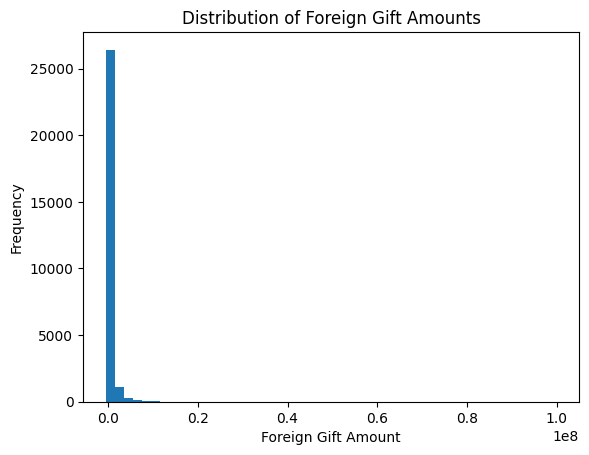

In [ ]:
plt.hist(fg["Foreign Gift Amount"].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

Foreign gift amounts are highly right-skewed, with most gifts being small and a small number of very large gifts. The distribution has a long right tail, indicating the presence of outliers that dominate the total amount of funding

In [ ]:
gift_type_counts = fg["Gift Type"].value_counts()
gift_type_props = fg["Gift Type"].value_counts(normalize=True)

print(gift_type_counts)
print(gift_type_props)

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


The proportion of contracts is 0.612097. The proportion of monetary gifts is 0.387513, while the proportion of real estate is 0.000390.

In [ ]:
top15_countries_count = (
    fg.groupby("Country of Giftor")
      .size()
      .sort_values(ascending=False)
      .head(15)
)

top15_countries_count

,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [ ]:
top15_countries_amount = (
    fg.groupby("Country of Giftor")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top15_countries_amount

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [ ]:
top15_institutions_amount = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top15_institutions_amount

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


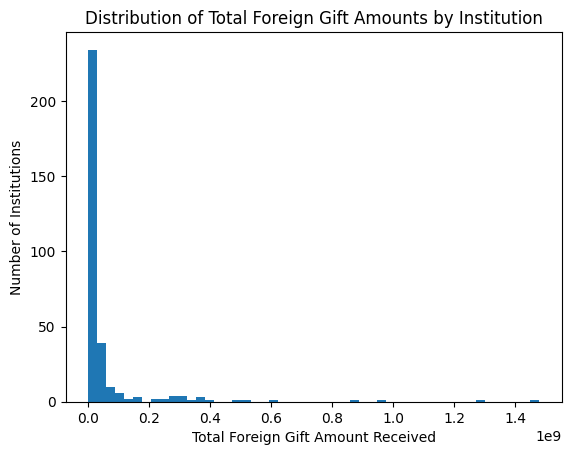

In [ ]:
institution_totals = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
)

plt.hist(institution_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gift Amounts by Institution")
plt.show()

In [ ]:
top_giftors = (
    fg.groupby("Giftor Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top_giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


Qatar Foundation provided the most money in total.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cc = pd.read_csv("scratchpad/data/college_completion.csv")

In [ ]:
cc.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
cc.shape

(3798, 63)

The dataset contains 3798 observations and 63 variables. Each observation looks like it represents a single postsecondary institution, and the variables are there to describe it.

In [ ]:
pd.crosstab(cc["control"], cc["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Private not-for-profit institutions are almost all four-year, public institutions include many two-year schools, and private for-profit institutions are fairly evenly split between two-year and four-year programs.

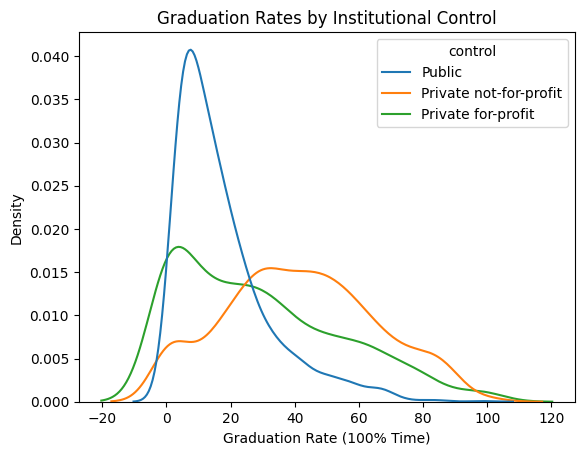

In [ ]:
sns.kdeplot(
    data=cc,
    x="grad_100_value",
    hue="control",
    common_norm=False
)
plt.xlabel("Graduation Rate (100% Time)")
plt.title("Graduation Rates by Institutional Control")
plt.show()

Private not-for-profit institutions appear to have the most favorable graduation rates, while private for-profit institutions have the least favorable outcomes.

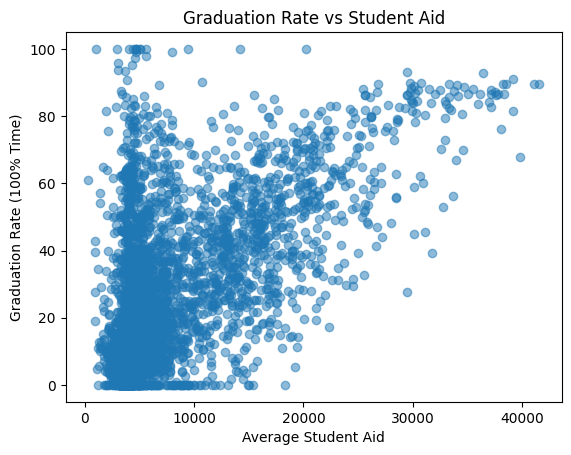

In [ ]:
plt.scatter(
    cc["aid_value"],
    cc["grad_100_value"],
    alpha=0.5
)
plt.xlabel("Average Student Aid")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs Student Aid")
plt.show()

There is a weak to moderate positive association between student aid and graduation rates. Institutions providing higher levels of aid tend to have higher graduation rates, but there is a lot of variability.

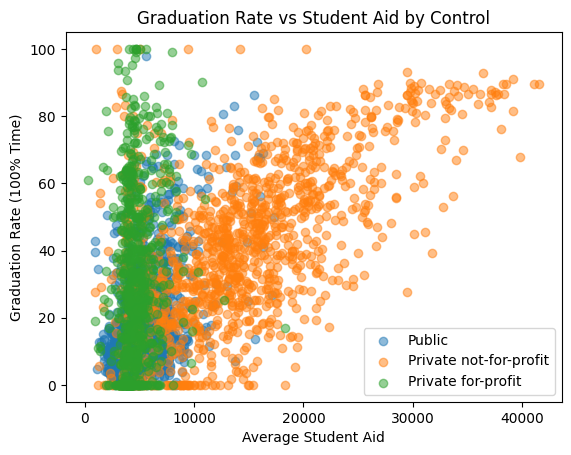

In [ ]:
for c in cc["control"].dropna().unique():
    subset = cc[cc["control"] == c]
    plt.scatter(
        subset["aid_value"],
        subset["grad_100_value"],
        alpha=0.5,
        label=c
    )

plt.xlabel("Average Student Aid")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs Student Aid by Control")
plt.legend()
plt.show()

The positive relationship between aid and graduation rates appears strongest for private not-for-profit institutions, weaker for public institutions, and weakest for private for-profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

[question 6 calculations](calculations.pdf)

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ames = pd.read_csv("scratchpad/data/ames_prices.csv")
ames[["price", "Bldg.Type"]].head()

,price,Bldg.Type
0,215000,1Fam
1,105000,1Fam
2,172000,1Fam
3,244000,1Fam
4,189900,1Fam


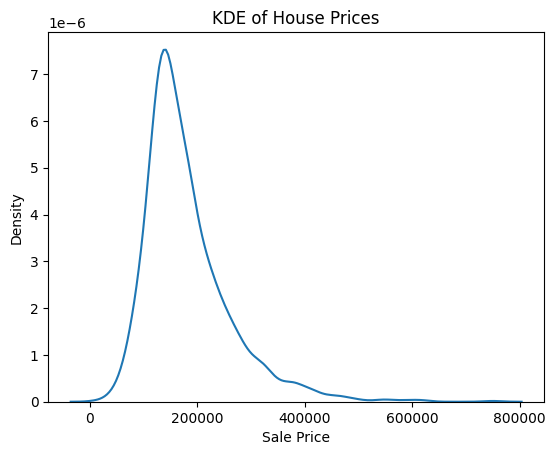

In [ ]:
sns.kdeplot(ames["price"].dropna())
plt.xlabel("Sale Price")
plt.title("KDE of House Prices")
plt.show()

In [ ]:
ames["price"].describe()

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


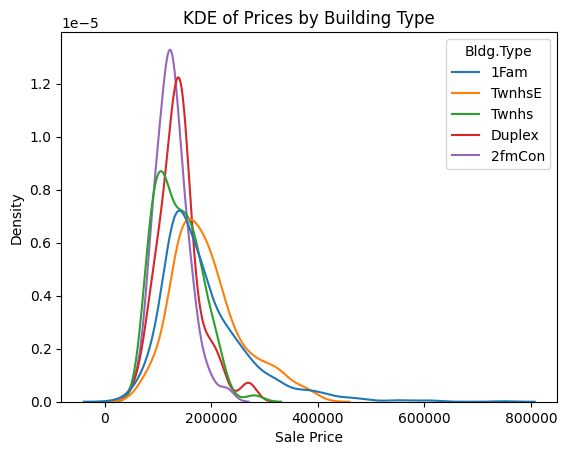

In [ ]:
sns.kdeplot(data=ames, x="price", hue="Bldg.Type", common_norm=False)
plt.xlabel("Sale Price")
plt.title("KDE of Prices by Building Type")
plt.show()

In [ ]:
by_type = ames.groupby("Bldg.Type")["price"].describe()
by_type

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


End-unit townhomes (TwnhsE) have the highest average sale price. Single-family homes (1Fam) have the highest variance in transaction prices

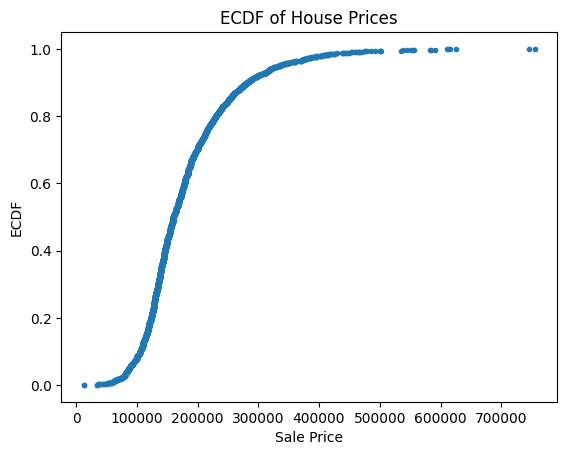

In [ ]:
x = ames["price"].dropna().sort_values()
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Sale Price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices")
plt.show()

In [ ]:
five_num = ames["price"].dropna().quantile([0, 0.25, 0.5, 0.75, 1.0])
five_num

,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


In [ ]:
five_num.index = ["min", "Q1", "median", "Q3", "max"]
five_num


,price
min,12789.0
Q1,129500.0
median,160000.0
Q3,213500.0
max,755000.0


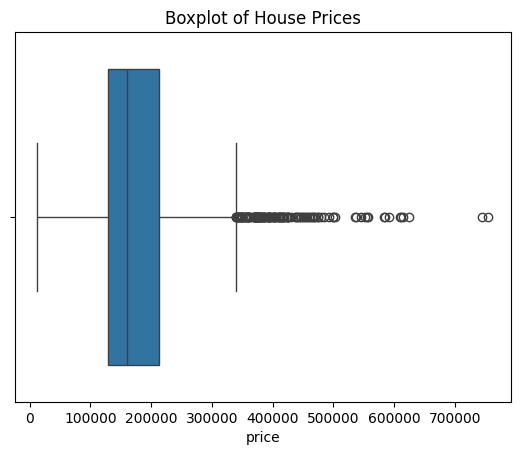

In [ ]:
sns.boxplot(x=ames["price"])
plt.title("Boxplot of House Prices")
plt.show()

There are many outliers on the very high-priced homes.

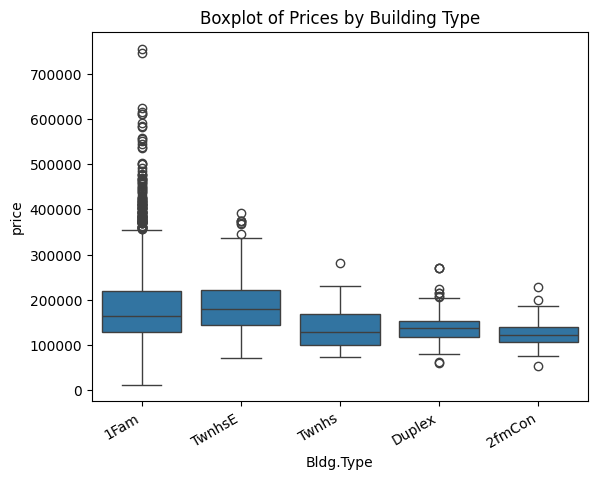

In [ ]:
sns.boxplot(data=ames, x="Bldg.Type", y="price")
plt.xticks(rotation=30, ha="right")
plt.title("Boxplot of Prices by Building Type")
plt.show()

Single-family homes show the greatest price variability and the most extreme outliers, while smaller multi-unit housing types have tighter and lower price distributions.

In [ ]:
q1 = ames["price"].quantile(0.25)
q3 = ames["price"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

ames["price_outlier"] = ((ames["price"] < lower) | (ames["price"] > upper)).astype(int)

ames["price_outlier"].value_counts()

,count
price_outlier,
0,2793
1,137


In [ ]:
low_cap = ames["price"].quantile(0.01)
high_cap = ames["price"].quantile(0.99)

ames["price_winsor"] = ames["price"].clip(lower=low_cap, upper=high_cap)

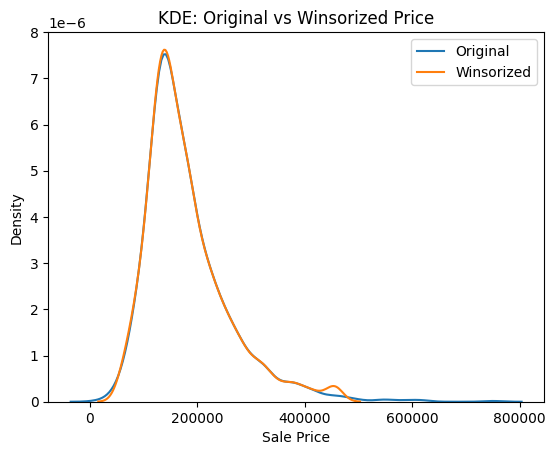

In [ ]:
sns.kdeplot(ames["price"].dropna(), label="Original")
sns.kdeplot(ames["price_winsor"].dropna(), label="Winsorized")
plt.xlabel("Sale Price")
plt.title("KDE: Original vs Winsorized Price")
plt.legend()
plt.show()

Winsorizing affects mainly the extreme values and does not alter the bulk of the data.

In [ ]:
ames["price"].describe(), ames["price_winsor"].describe()

(count      2930.000000
 mean     180796.060068
 std       79886.692357
 min       12789.000000
 25%      129500.000000
 50%      160000.000000
 75%      213500.000000
 max      755000.000000
 Name: price, dtype: float64,
 count      2930.000000
 mean     180091.154334
 std       75842.579174
 min       61756.070000
 25%      129500.000000
 50%      160000.000000
 75%      213500.000000
 max      456666.370000
 Name: price_winsor, dtype: float64)